# Import Needed Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


# Read User Behaviour data set and Discover it's Structure

In [ ]:
df=pd.read_csv('log_mini.csv')

In [ ]:
#Show first 5 cells
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   skip_1                           167880 non-null  bool  
 5   skip_2                           167880 non-null  bool  
 6   skip_3                           167880 non-null  bool  
 7   not_skipped                      167880 non-null  bool  
 8   context_switch                   167880 non-null  int64 
 9   no_pause_before_play             167880 non-null  int64 
 10  short_pause_before_play          167880 non-null  int64 
 11  long_pause_before_play           167880 non-null  int64 
 12  hist_user_behavi

In [ ]:
df.shape

(167880, 21)

In [ ]:
df.isna().sum()

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True3)

In [ ]:
sum(df.duplicated())

0

**No Nulls and duplicates were found in data set**

In [ ]:
df.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000






*   Session position ranges between 1 to 20.
*   Session length ranges between 10 to 20.
*   context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play are boolean showing 1 if it accured and 0 if not.
*  hist_user_behavior_n_seekfwd	is number of times user pressed on forward button ranging from 0-60
*  hist_user_behavior_n_seekback is number of times user pressed on backward button ranging from 0-150.
*   Hour of day showing 24 hrs of day.





# Outliers

<Axes: >

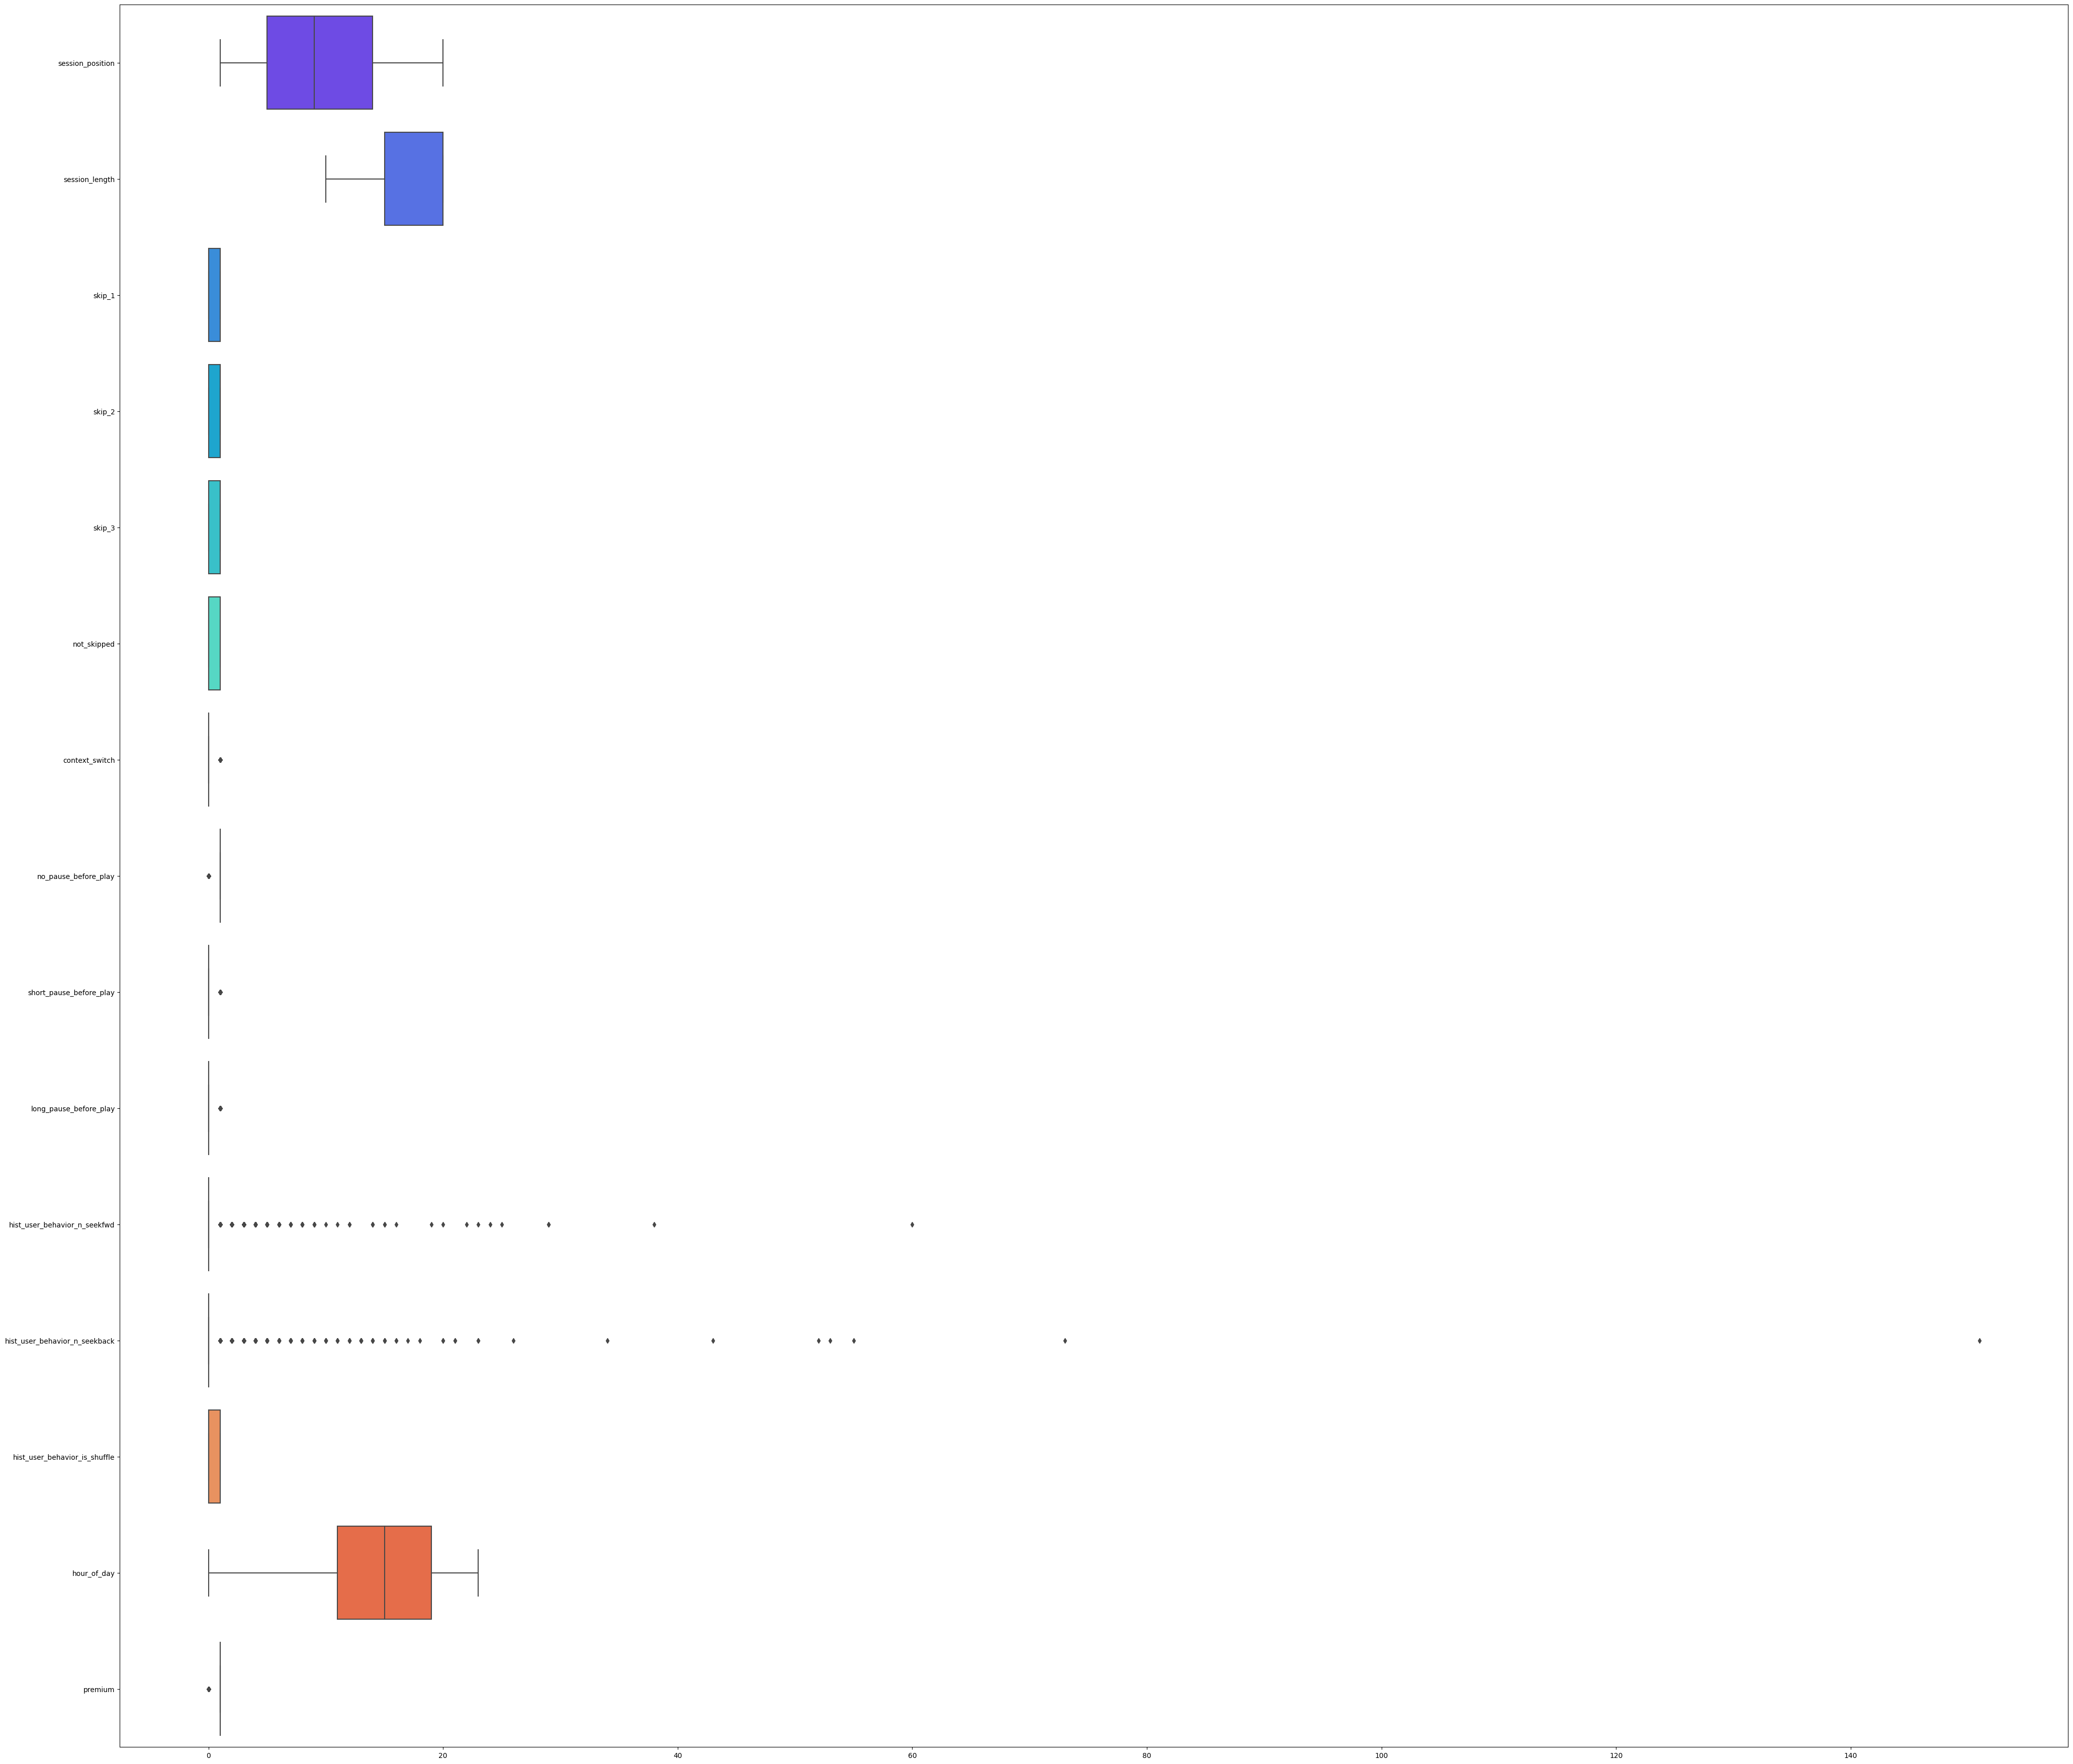

In [ ]:
plt.figure(figsize= (50,45))
sns.boxplot(data=df,palette='rainbow',orient='h')

In [ ]:
df_numerical=df.select_dtypes(include=np.number)
for col in df_numerical:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    

Number of outliers in session_position: 0
Number of outliers in session_length: 0
Number of outliers in context_switch: 6867
Number of outliers in no_pause_before_play: 37474
Number of outliers in short_pause_before_play: 0
Number of outliers in long_pause_before_play: 0
Number of outliers in hist_user_behavior_n_seekfwd: 2056
Number of outliers in hist_user_behavior_n_seekback: 2096
Number of outliers in hour_of_day: 0




*   For Binary features as context type it seems like there is a minority class represented as 0 or 1 so it considered it as an outlier but in reality those columns are biased we can choose to drop them or over sample minority class.
*   The amount of outliers in seek_fwd and seek_back is too small so i have decided not handle them.



# session_position Distribution

<Axes: xlabel='session_position', ylabel='count'>

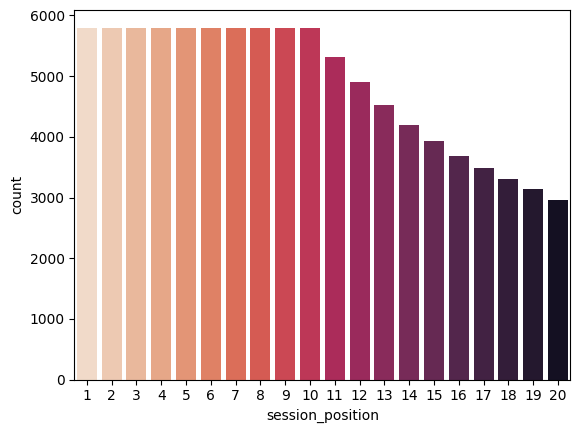

In [ ]:
sns.countplot(x='session_position',data=df,palette="rocket_r")


# Session Length Distribution

<Axes: xlabel='session_length', ylabel='count'>

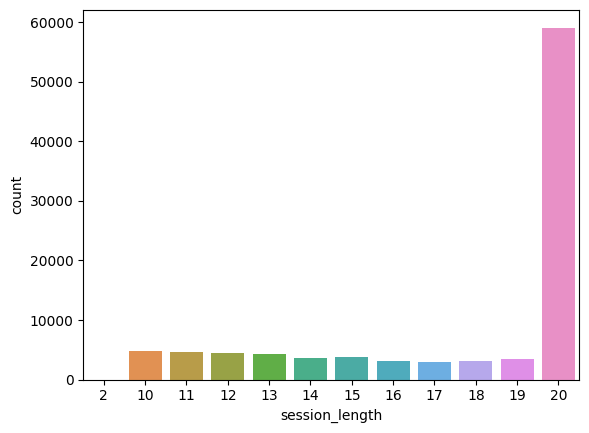

In [ ]:
sns.countplot(x='session_length',data=df)

**Most Session_Length is 20**

# Create a new Feature indicating whether track is skipped or not.

In [ ]:
df["skipped"] = df["skip_1"]*df["skip_2"]*df["skip_3"]
df.drop(["skip_1", "skip_2", "skip_3", "not_skipped"], axis=1, inplace=True)
df.head(3)

,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,0.0,0.0,0.0,0.0,0.0,True,16.0,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0.0,1.0,0.0,0.0,0.0,0.0,True,16.0,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0.0,1.0,0.0,0.0,0.0,0.0,True,16.0,2018-07-15,True,editorial_playlist,trackdone,trackdone,0


# Song Skip Status

In [ ]:
import plotly.express as ex
ex.pie(df,names='skipped',title='Song Skip Status',hole=0.20)

In [ ]:
df["skipped"].value_counts()

0    56404
1    41005
Name: skipped, dtype: int64

**Majority of Songs are not Skipped**

# Context Switch

Text(0, 0.5, 'Count')

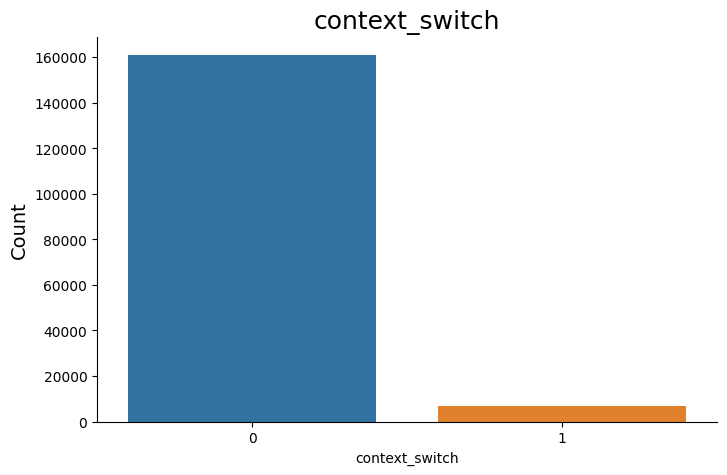

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="context_switch", data=df)
sns.despine()
plt.title("context_switch", fontsize = 18)
plt.ylabel("Count", fontsize = 14)



*   **It makes sense that 0 is most occuring value as most songs are not Skipped.**
*   **We should consider dropping this column as it is biased or using over sampling techniques.**



# short_pause_before_play Distribution

In [ ]:
import plotly.express as ex
ex.pie(df,names='short_pause_before_play',title='short_pause_before_play distribution',hole=0.20)

# Long Pause Before Play Distribution

In [ ]:
import plotly.express as ex
ex.pie(df,names='long_pause_before_play',title='long_pause_before_play distribution',hole=0.20)

**Most Users don't pause song before play so we can conclude that no_pause_before_play feature most values will be 1**

****

# no_pause_before_play Distribution


In [ ]:
import plotly.express as ex
ex.pie(df,names='no_pause_before_play',title='no_pause_before_play distribution',hole=0.20)

**Our Conclusion was right!!**

# Use Button to go forward or backward

<Axes: xlabel='hist_user_behavior_n_seekfwd', ylabel='count'>

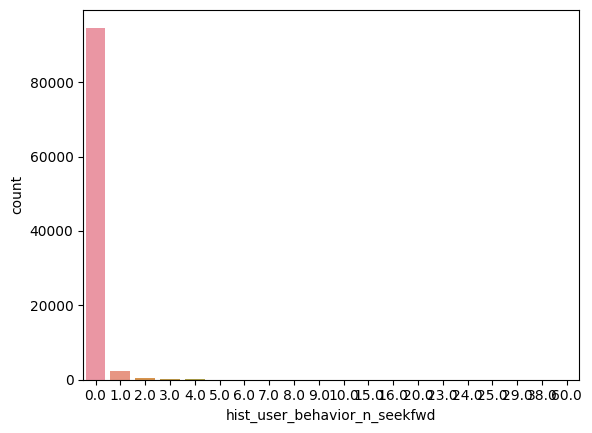

In [ ]:
sns.countplot(x='hist_user_behavior_n_seekfwd',data=df)

<Axes: xlabel='hist_user_behavior_n_seekback', ylabel='count'>

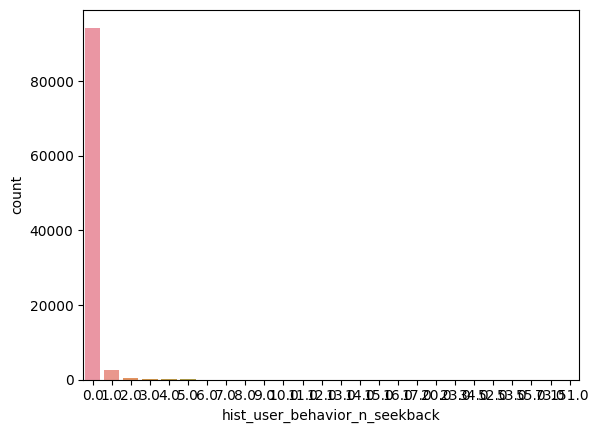

In [ ]:
sns.countplot(x='hist_user_behavior_n_seekback',data=df)



*   **Most User's don't seek button to go forward or backward**
*   **Again We are having the same problem as those two columns are biased .**



# shuffle

In [ ]:
import plotly.express as ex
ex.pie(df,names='hist_user_behavior_is_shuffle',title='hist_user_behavior_is_shuffle distribution',hole=0.20)

**Most User's don't shuffle music**

# Hours User's listen to music in throughout day Distribution

<Axes: xlabel='hour_of_day', ylabel='count'>

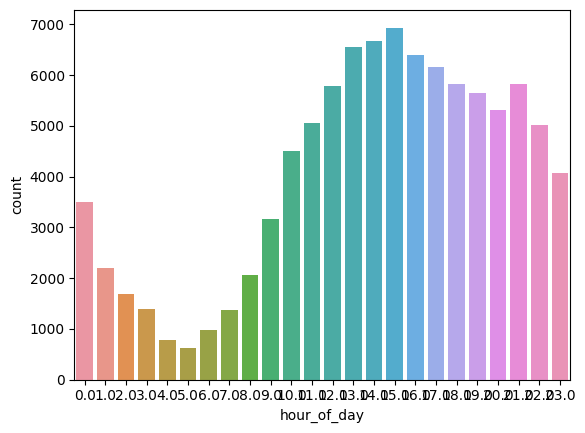

In [ ]:
sns.countplot(x="hour_of_day",data=df)

**No of Users listening to music on starts to increase from 10 am**

# Context Type

Text(0, 0.5, 'Count')

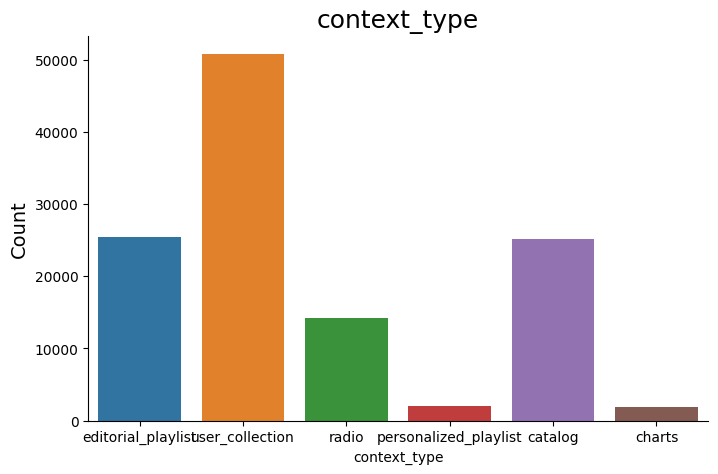

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="context_type", data=df)
sns.despine()
plt.title("context_type", fontsize = 18)
plt.ylabel("Count", fontsize = 14)

**Most User's listen to music from their collection**

# Reason to Start music Session or end it

Text(0, 0.5, 'Count')

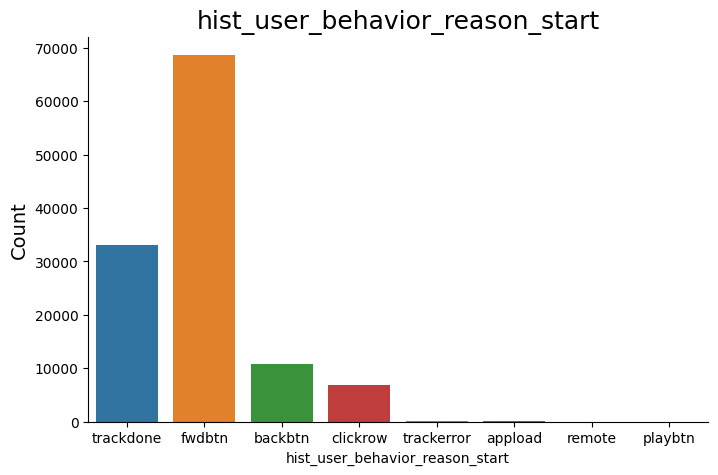

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="hist_user_behavior_reason_start", data=df)
sns.despine()
plt.title("hist_user_behavior_reason_start", fontsize = 18)
plt.ylabel("Count", fontsize = 14)

Text(0, 0.5, 'Count')

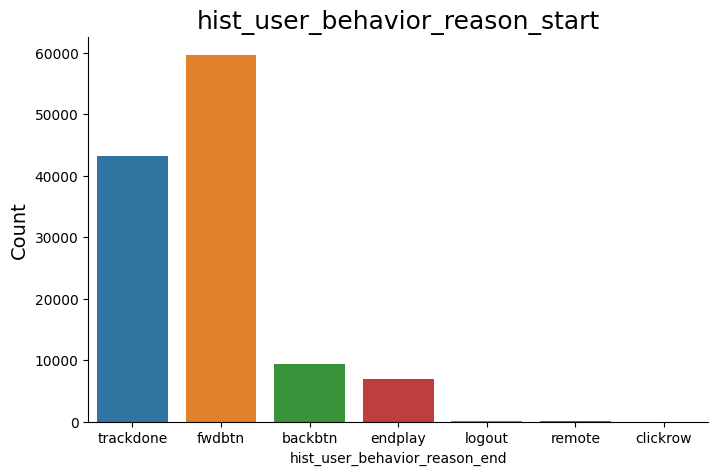

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="hist_user_behavior_reason_end", data=df)
sns.despine()
plt.title("hist_user_behavior_reason_start", fontsize = 18)
plt.ylabel("Count", fontsize = 14)

**Most User's start session using fwdbtn same goes for ending session**

# Premium Subscription

Text(0, 0.5, 'Count')

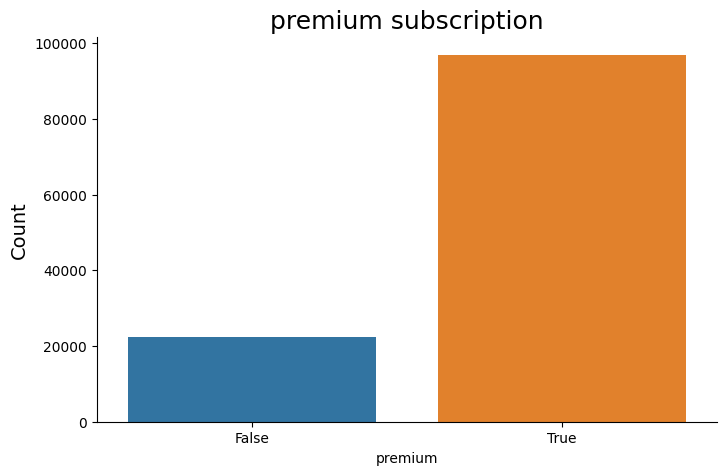

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="premium", data=df)
sns.despine()
plt.title("premium subscription", fontsize = 18)
plt.ylabel("Count", fontsize = 14)

**Most User's have premuim subscription**